#IMPORT NECESSARY LIBRARIES

In [1]:
import os
import random
random.seed(42) # Set random seed for reproducibility
import time
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


/tmp/ipykernel_3042511/3391910190.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


##Define runtime

In [3]:
# !pip install ipython-autotime
%load_ext autotime

time: 168 µs (started: 2024-08-08 21:36:09 +07:00)


#DATA PREPARATION

##Get and Import dataset

In [7]:
# !gdown "1Ebju7n2W8WoWSFSPouDfbJcaW47Nozgv"
# !unzip "/content/ISIC_2019_Challenge_Dataset.zip"

time: 505 µs (started: 2024-08-08 15:51:46 +07:00)


In [8]:
# import zipfile

# with zipfile.ZipFile('data/ISIC_2019_Challenge_Dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall()

# with zipfile.ZipFile('data/ISIC_2019_Training_Input.zip', 'r') as zip_ref:
#     zip_ref.extractall()

# with zipfile.ZipFile('data/ISIC_2019_Test_Input.zip', 'r') as zip_ref:
#     zip_ref.extractall()

time: 650 µs (started: 2024-08-08 15:51:47 +07:00)


In [9]:
# !gdown "1b-NZohmAAwhtZ-81EIt5bCI-c_3u-2jW"
# !gdown "1W3PE0W183h0nXW4ISSzW_aMZ4MWuDwhx"
# !gdown "1DQdofCumMkc8oGiHePB0sdMLMopXfvx-"
# !gdown "1FRM1CPVjVFxWLbZh242NTzR8L662DQ2e"
# !gdown "1T24VIj4GGyKv_ioSuOlz1zp08emXKXXE"

time: 567 µs (started: 2024-08-08 15:51:48 +07:00)


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

# data_dir = '/content/drive/MyDrive/MASTER 1/Internship/ICT Lab/WORKSPACE/data/ISIC_2019/'
# data_dir = '/content'
# data_dir = '/content/drive/MyDrive/WORKSPACE/data/ISIC_2019'
data_dir = 'data/ISIC_2019'

training_input_zip = data_dir + '/ISIC_2019_Training_Input.zip'
test_input_zip = data_dir + '/ISIC_2019_Test_Input.zip'

training_Metadata = data_dir + '/ISIC_2019_Training_Metadata.csv'
training_GroundTruth =  data_dir + '/ISIC_2019_Training_GroundTruth.csv'
test_Metadata = data_dir + '/ISIC_2019_Test_Metadata.csv'

# !unzip "$training_input_zip"
# !unzip "$test_input_zip"

training_input_dir = data_dir + '/ISIC_2019_Training_Input'
test_input_dir = data_dir + '/ISIC_2019_Test_Input'

time: 1.02 ms (started: 2024-08-08 21:36:10 +07:00)


###Meta-data

In [5]:
train_metadata=pd.read_csv(training_Metadata)
train_metadata

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


time: 113 ms (started: 2024-08-08 21:36:13 +07:00)


In [6]:
train_groundtruth=pd.read_csv(training_GroundTruth)
# # Drop the 'UNK' column
# train_groundtruth = train_groundtruth.drop(columns=['UNK'])
train_groundtruth

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 77.1 ms (started: 2024-08-08 21:36:16 +07:00)


In [7]:
test_metadata=pd.read_csv(test_Metadata)
test_metadata

,image,age_approx,anatom_site_general,sex
0,ISIC_0034321,60.0,NaN,female
1,ISIC_0034322,70.0,anterior torso,male
2,ISIC_0034323,70.0,lower extremity,male
3,ISIC_0034324,70.0,lower extremity,male
4,ISIC_0034325,30.0,upper extremity,female
...,...,...,...,...
8233,ISIC_0073236,75.0,anterior torso,male
8234,ISIC_0073243,65.0,lower extremity,male
8235,ISIC_0073250,30.0,anterior torso,female
8236,ISIC_0073252,85.0,head/neck,female


time: 25.3 ms (started: 2024-08-08 21:36:16 +07:00)


###Meta-data information

In [10]:
train_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
dtypes: float64(1), object(4)
memory usage: 989.6+ KB
time: 18 ms (started: 2024-08-08 14:56:14 +07:00)


In [11]:
train_groundtruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB
time: 10.9 ms (started: 2024-08-08 14:56:14 +07:00)


In [12]:
test_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                8238 non-null   object 
 1   age_approx           7912 non-null   float64
 2   anatom_site_general  7583 non-null   object 
 3   sex                  7899 non-null   object 
dtypes: float64(1), object(3)
memory usage: 257.6+ KB
time: 9.42 ms (started: 2024-08-08 14:56:15 +07:00)


In [13]:
def print_unique_counts(df, df_name):
    print(f"\n{'-'*40}")
    print(f"{df_name.upper()}")
    print(f"{'-'*40}")

    unique_counts = df.nunique()
    print("\nUnique entries in each column:")
    for col in unique_counts.index:
        print(f"- {col}: {unique_counts[col]}")

# Now use the function for each dataframe
print_unique_counts(train_metadata, 'Train Metadata')
print_unique_counts(train_groundtruth, 'Train Groundtruth')
print_unique_counts(test_metadata, 'Test Metadata')



----------------------------------------
TRAIN METADATA
----------------------------------------

Unique entries in each column:
- image: 25331
- age_approx: 18
- anatom_site_general: 8
- lesion_id: 11847
- sex: 2

----------------------------------------
TRAIN GROUNDTRUTH
----------------------------------------

Unique entries in each column:
- image: 25331
- MEL: 2
- NV: 2
- BCC: 2
- AK: 2
- BKL: 2
- DF: 2
- VASC: 2
- SCC: 2
- UNK: 1

----------------------------------------
TEST METADATA
----------------------------------------

Unique entries in each column:
- image: 8238
- age_approx: 18
- anatom_site_general: 7
- sex: 2
time: 29.6 ms (started: 2024-08-07 23:23:30 +07:00)


In [18]:
# train_metadata['anatom_site_general'].unique()

time: 470 µs (started: 2024-08-06 17:21:22 +07:00)


##Data Analysis

###Meta-data describe

In [19]:
def describe_and_check_nulls(df, df_name):
    print(f"\n{'-'*40}")
    print(f"{df_name.upper()}")
    print(f"{'-'*40}")

    print("\nDescription:")
    print(df.describe(include='all'))

    print("\nNull Values:")
    null_values = df.isnull().sum()
    print(null_values)

    print("\nPercentage of Null Values:")
    print(null_values / len(df) * 100)

# Now use the function for each dataframe
describe_and_check_nulls(train_metadata, 'Train Metadata')
describe_and_check_nulls(train_groundtruth, 'Train Groundtruth')
describe_and_check_nulls(test_metadata, 'Test Metadata')



----------------------------------------
TRAIN METADATA
----------------------------------------

Description:
               image    age_approx anatom_site_general    lesion_id    sex
count          25331  24894.000000               22700        23247  24947
unique         25331           NaN                   8        11847      2
top     ISIC_0000000           NaN      anterior torso  BCN_0001728   male
freq               1           NaN                6915           31  13286
mean             NaN     54.028481                 NaN          NaN    NaN
std              NaN     18.130971                 NaN          NaN    NaN
min              NaN      0.000000                 NaN          NaN    NaN
25%              NaN     40.000000                 NaN          NaN    NaN
50%              NaN     55.000000                 NaN          NaN    NaN
75%              NaN     70.000000                 NaN          NaN    NaN
max              NaN     85.000000                 NaN         

In [ ]:
# train_metadata.describe(include='all')
# train_groundtruth.describe(include='all')
# test_metadata.describe(include='all')

# print("\ntrain_metadata")
# print(train_metadata.isnull().sum())
# print("\ntrain_groundtruth")
# print(train_groundtruth.isnull().sum())
# print("\ntest_metadata")
# print(test_metadata.isnull().sum())

time: 479 µs (started: 2024-08-03 16:36:56 +00:00)


###Plot data

####Define and describe meta-data's columns

In [20]:
# List of dataframes
dfs = [train_metadata, train_groundtruth, test_metadata]
df_names = ['train_metadata', 'train_groundtruth', 'test_metadata']

time: 863 µs (started: 2024-08-06 17:21:42 +07:00)


In [21]:
# Define categorical and numerical columns
categorical_columns = ['lesion_id', 'image', 'anatom_site_general', 'sex']
numerical_columns = ['age_approx']


time: 637 µs (started: 2024-08-06 17:21:43 +07:00)


In [22]:
# Describe each dataframe
def describe_columns(df, df_name):
    print(f"\n{'-'*40}")
    print(f"{df_name.upper()}")
    print(f"{'-'*40}")

    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    print("\nNumerical Columns:")
    for col in numerical_cols:
        print(f"- {col}")

    print("\nCategorical Columns:")
    for col in categorical_cols:
        print(f"- {col}")

# Describe each dataframe
describe_columns(train_metadata, 'Train Metadata')
describe_columns(train_groundtruth, 'Train Groundtruth')
describe_columns(test_metadata, 'Test Metadata')



----------------------------------------
TRAIN METADATA
----------------------------------------

Numerical Columns:
- age_approx

Categorical Columns:
- image
- anatom_site_general
- lesion_id
- sex

----------------------------------------
TRAIN GROUNDTRUTH
----------------------------------------

Numerical Columns:
- MEL
- NV
- BCC
- AK
- BKL
- DF
- VASC
- SCC
- UNK

Categorical Columns:
- image

----------------------------------------
TEST METADATA
----------------------------------------

Numerical Columns:
- age_approx

Categorical Columns:
- image
- anatom_site_general
- sex
time: 9.77 ms (started: 2024-08-06 17:21:44 +07:00)


####Missing values

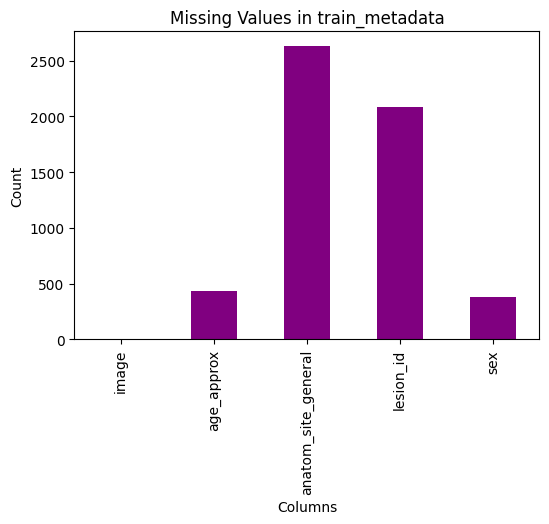

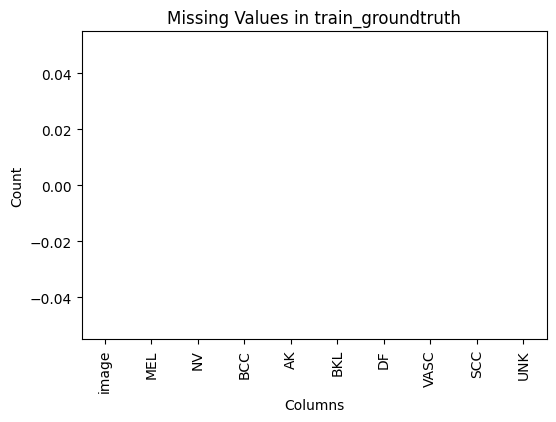

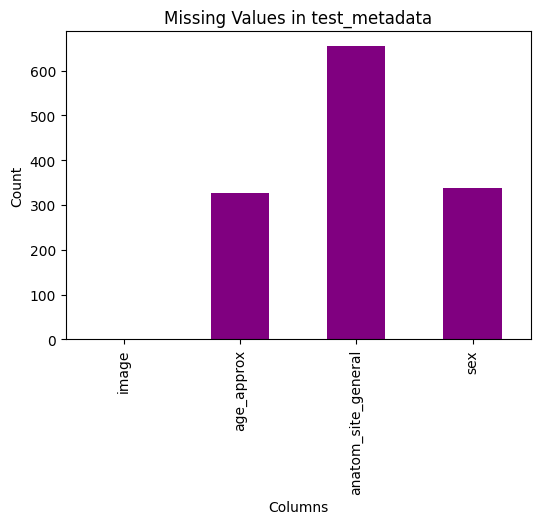

time: 3.37 s (started: 2024-08-03 16:36:57 +00:00)


In [ ]:
# Loop through dataframes
for i, df in enumerate(dfs):
    # Calculate missing values
    missing_values = df.isnull().sum()

    # Plot missing values
    plt.figure(figsize=(6, 4))
    missing_values.plot(kind='bar', color='purple')
    plt.title('Missing Values in ' + df_names[i])
    plt.ylabel('Count')
    plt.xlabel('Columns')
    plt.show()


####Training-Metadata distribution

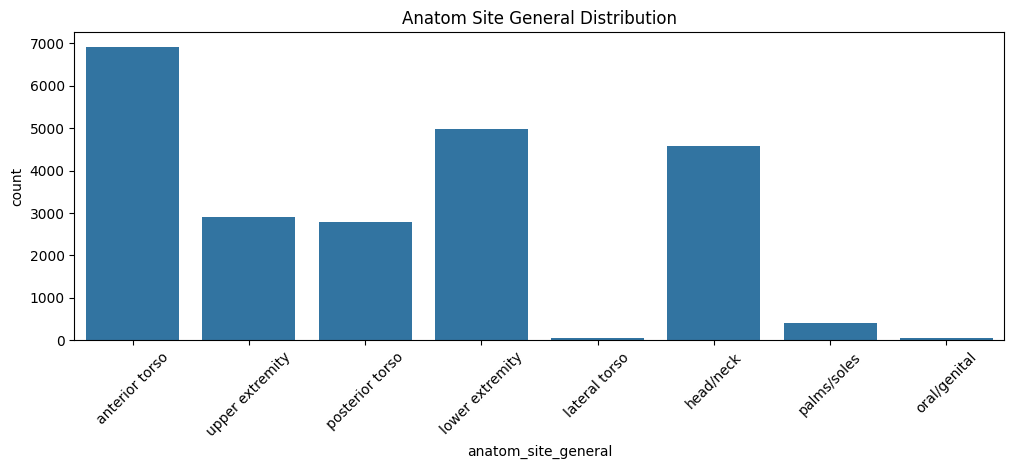

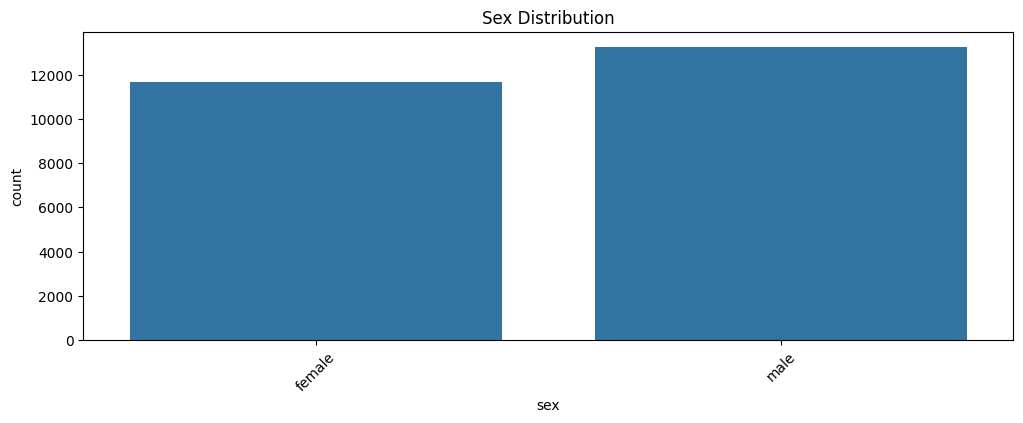

time: 2.54 s (started: 2024-08-03 16:37:00 +00:00)


In [ ]:
# Function to plot value counts for a given column
def plot_value_counts(data, column, title, figsize=(12, 4), rotation=45):
    plt.figure(figsize=figsize)
    sns.countplot(data=data, x=column)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()

# List of categorical columns to plot
categorical_columns_grt = ['anatom_site_general', 'sex']
# categorical_columns_grt = ['anatom_site_general', 'sex', 'lesion_id', 'image']

# Plot value counts for each categorical column
for column in categorical_columns_grt:
    plot_value_counts(train_metadata, column, f'{column.replace("_", " ").title()} Distribution')

# Plot value counts for lesion_id and image if needed
# plot_value_counts(train_metadata, 'lesion_id', 'Lesion ID Distribution', figsize=(16, 4))
# plot_value_counts(train_metadata, 'image', 'Image Name Distribution', figsize=(16, 4))

####Training_Groundtruth distribution

<ipython-input-22-57af30f33fcc>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=disease_type_counts_df, x='Disease Type', y='Count', palette='viridis')


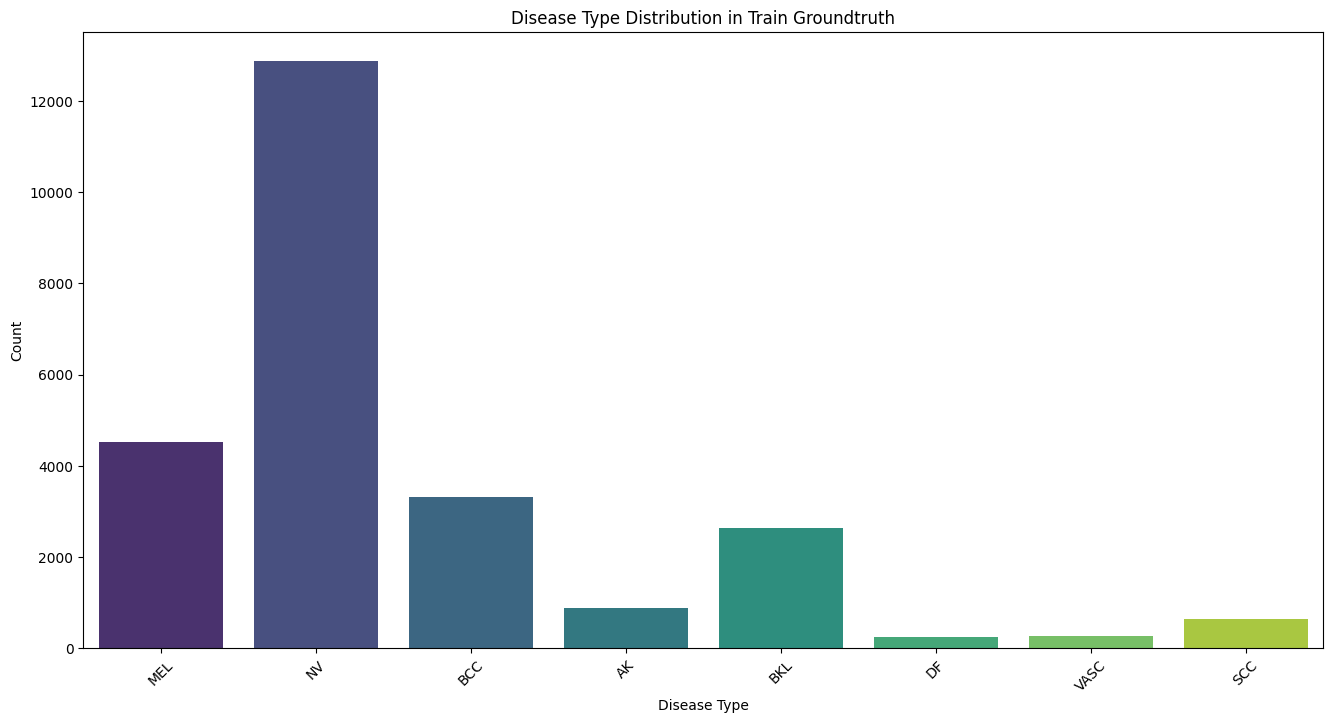

time: 1.64 s (started: 2024-08-03 16:37:03 +00:00)


In [ ]:
# Define columns to plot (excluding 'image' and 'UNK')
disease_type = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']

# Sum up the counts of each class
disease_type_counts = train_groundtruth[disease_type].sum()

# Convert to DataFrame for easier plotting
disease_type_counts_df = pd.DataFrame(disease_type_counts).reset_index()
disease_type_counts_df.columns = ['Disease Type', 'Count']

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(data=disease_type_counts_df, x='Disease Type', y='Count', palette='viridis')
plt.title('Disease Type Distribution in Train Groundtruth')
plt.xlabel('Disease Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


###Data Analysis for Relationship among variables

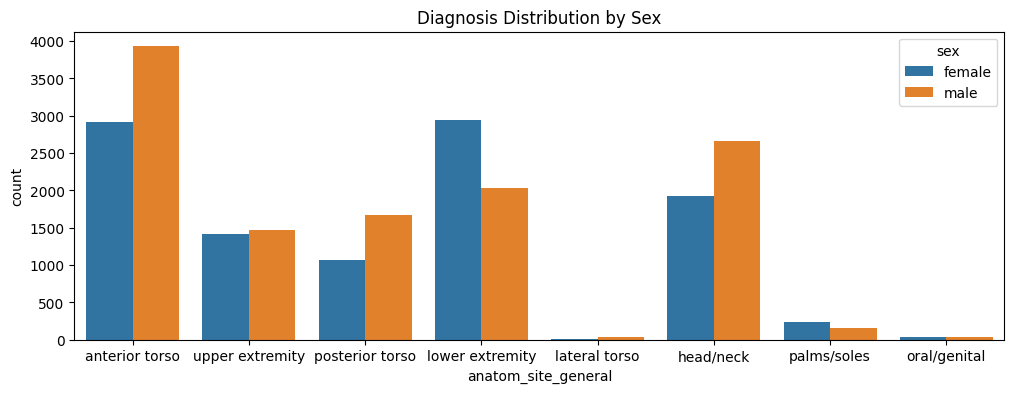

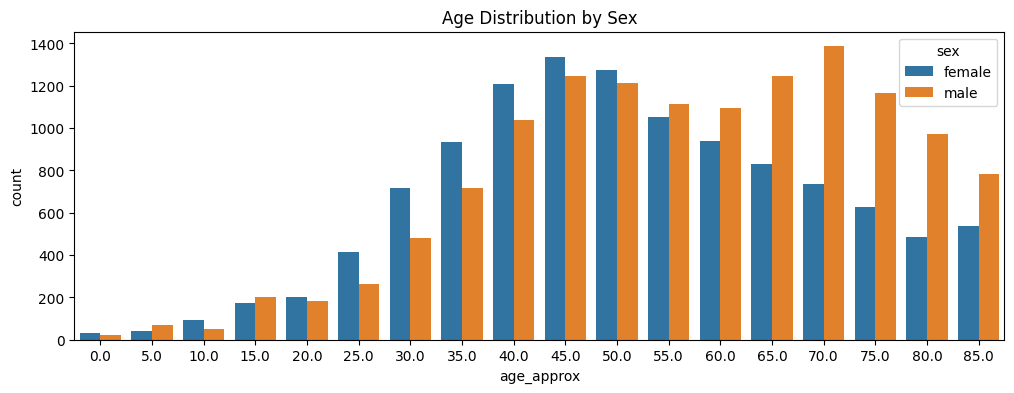

time: 4.38 s (started: 2024-08-03 16:37:04 +00:00)


In [ ]:
# Visualizing relationships between anatom_site_general and sex
plt.figure(figsize=(12, 4))
sns.countplot(data=train_metadata, x='anatom_site_general', hue='sex')
plt.title('Diagnosis Distribution by Sex')
plt.show()

# Visualizing relationships between age_approx and sex
plt.figure(figsize=(12, 4))
sns.countplot(data=train_metadata, x='age_approx', hue='sex')
plt.title('Age Distribution by Sex')
plt.show()

In [ ]:
# Merge the metadata and groundtruth dataframes on the 'image' column
combined_df = pd.merge(train_metadata, train_groundtruth, on='image')

# Melt the dataframe to have disease types as a single column
melted_df = pd.melt(combined_df, id_vars=['image', 'sex', 'age_approx', 'anatom_site_general'], value_vars=disease_type)

# Filter out rows where value is 0 (i.e., the disease type is not present)
filtered_df = melted_df[melted_df['value'] == 1]

time: 257 ms (started: 2024-08-03 16:37:09 +00:00)


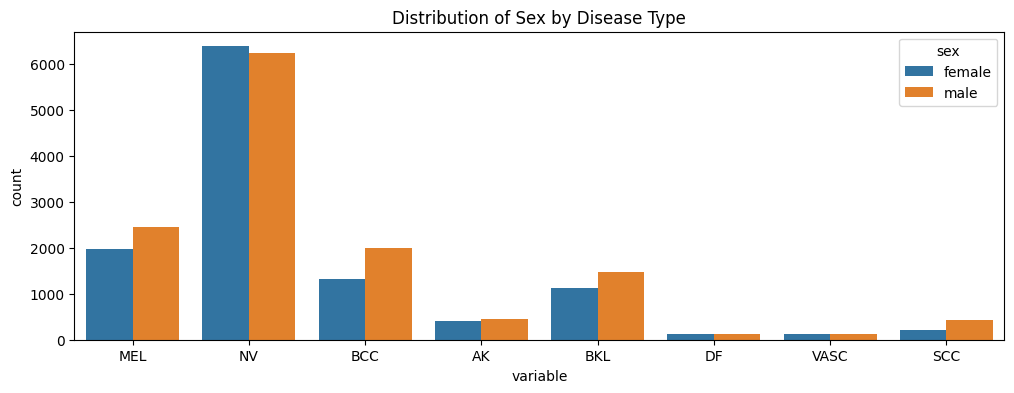

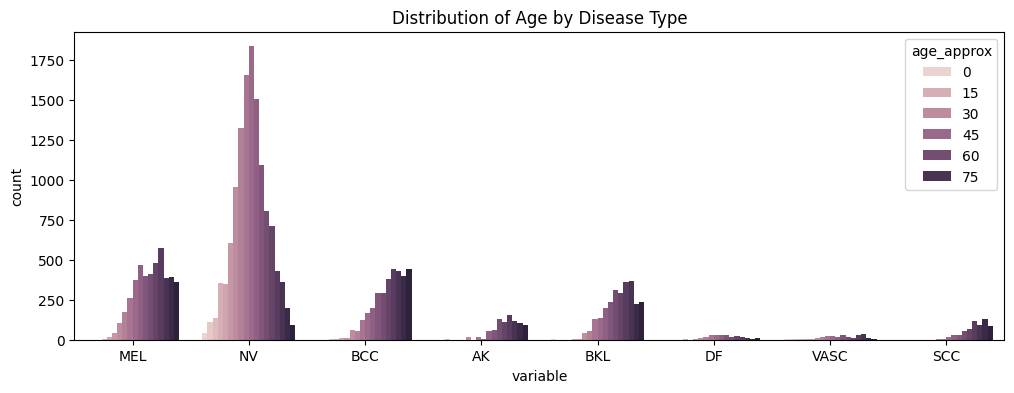

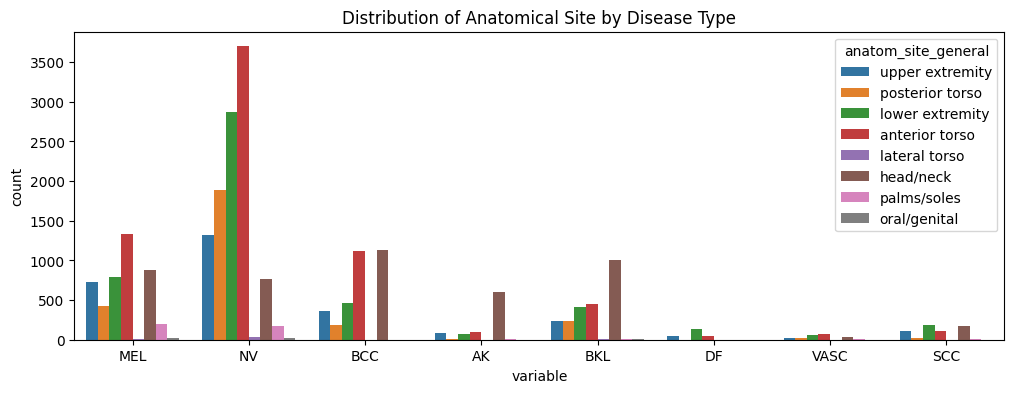

time: 5.39 s (started: 2024-08-03 16:37:09 +00:00)


In [ ]:
# Plot the distribution of 'sex' by disease type
plt.figure(figsize=(12, 4))
sns.countplot(data=filtered_df, x='variable', hue='sex')
plt.title('Distribution of Sex by Disease Type')
plt.show()

# Plot the distribution of 'age_approx' by disease type
plt.figure(figsize=(12, 4))
sns.countplot(data=filtered_df, x='variable', hue='age_approx')
plt.title('Distribution of Age by Disease Type')
plt.show()

# Plot the distribution of 'anatom_site_general' by disease type
plt.figure(figsize=(12, 4))
sns.countplot(data=filtered_df, x='variable', hue='anatom_site_general')
plt.title('Distribution of Anatomical Site by Disease Type')
plt.show()

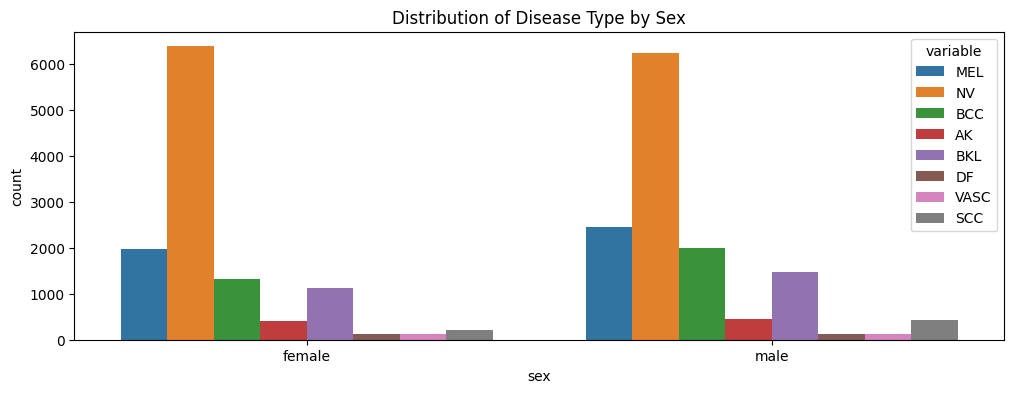

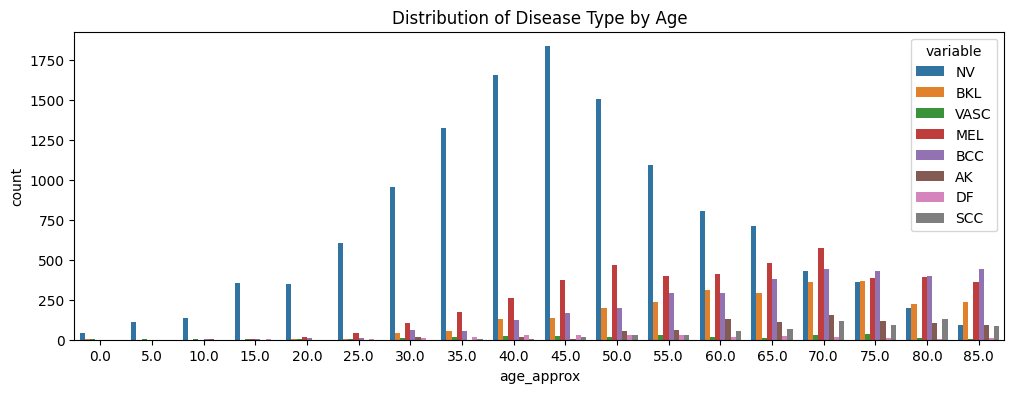

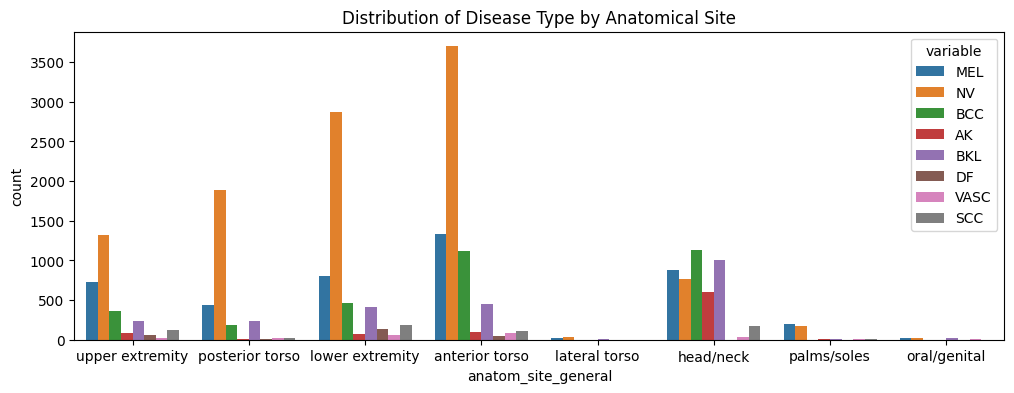

time: 4.16 s (started: 2024-08-03 16:37:14 +00:00)


In [ ]:
# Plot the distribution of disease type by 'sex'
plt.figure(figsize=(12, 4))
sns.countplot(data=filtered_df, x='sex', hue='variable')
plt.title('Distribution of Disease Type by Sex')
plt.show()

# Plot the distribution of disease type by 'age_approx'
plt.figure(figsize=(12, 4))
sns.countplot(data=filtered_df, x='age_approx', hue='variable')
plt.title('Distribution of Disease Type by Age')
plt.show()

# Plot the distribution of disease type by 'anatom_site_general'
plt.figure(figsize=(12, 4))
sns.countplot(data=filtered_df, x='anatom_site_general', hue='variable')
plt.title('Distribution of Disease Type by Anatomical Site')
plt.show()


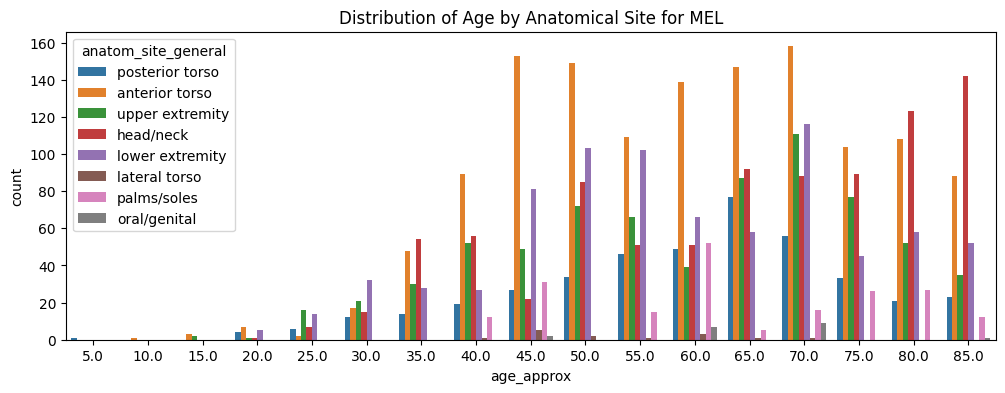

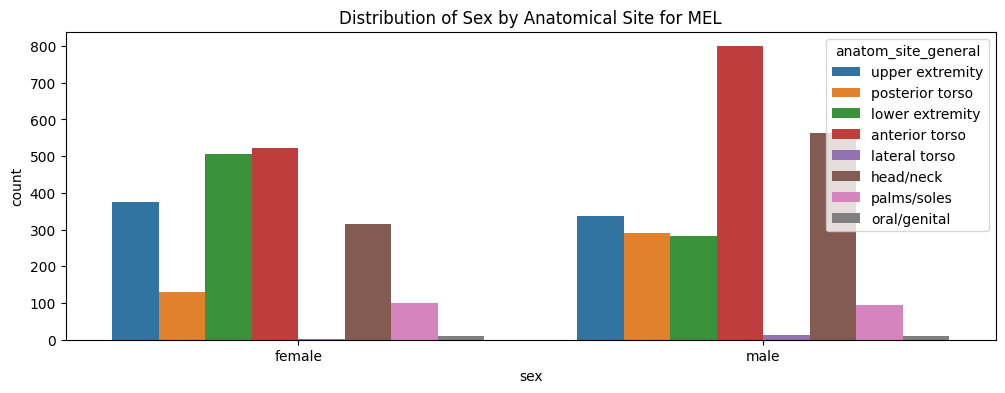

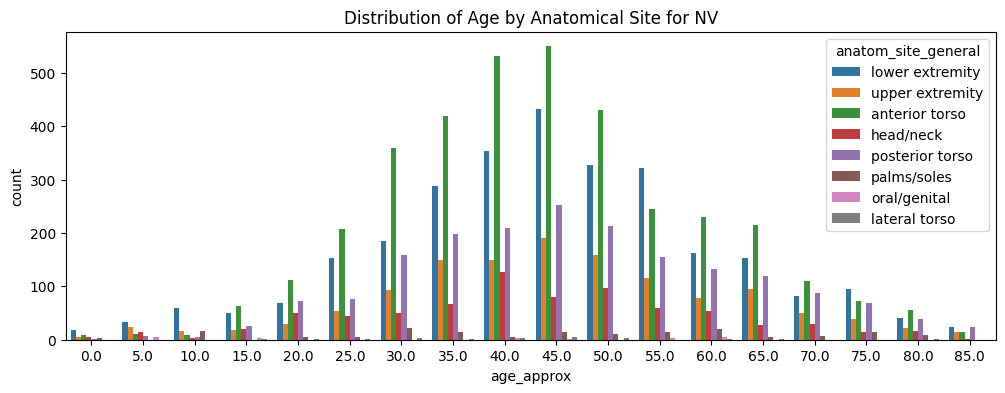

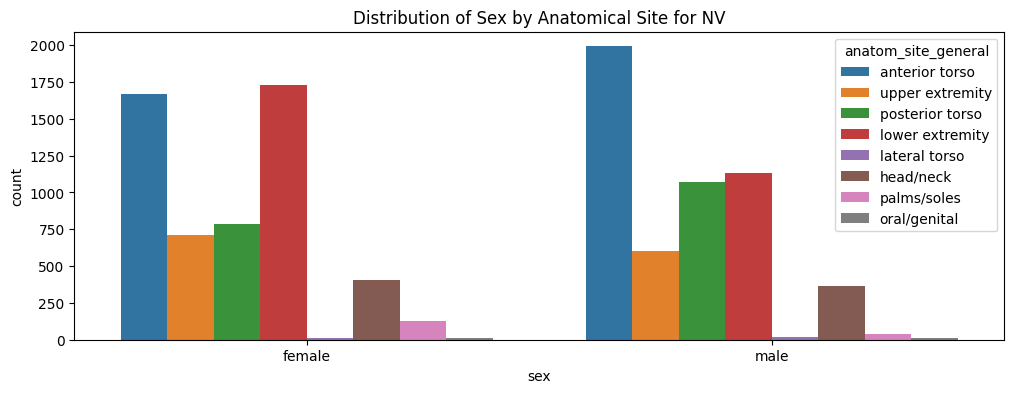

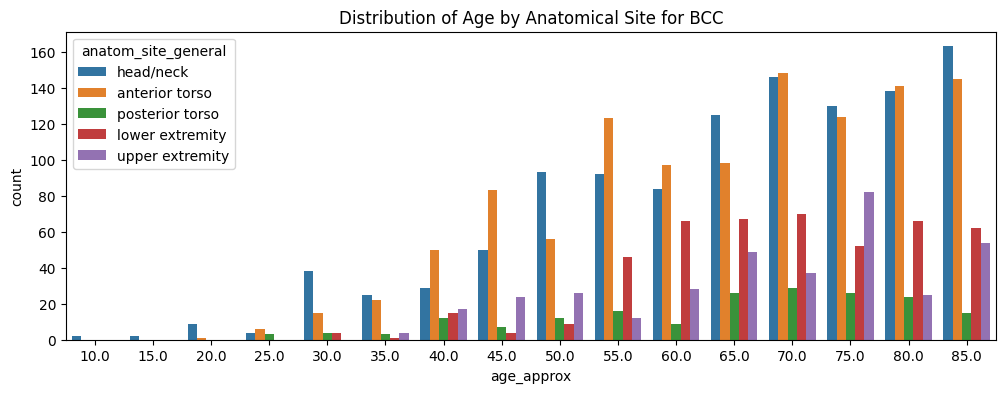

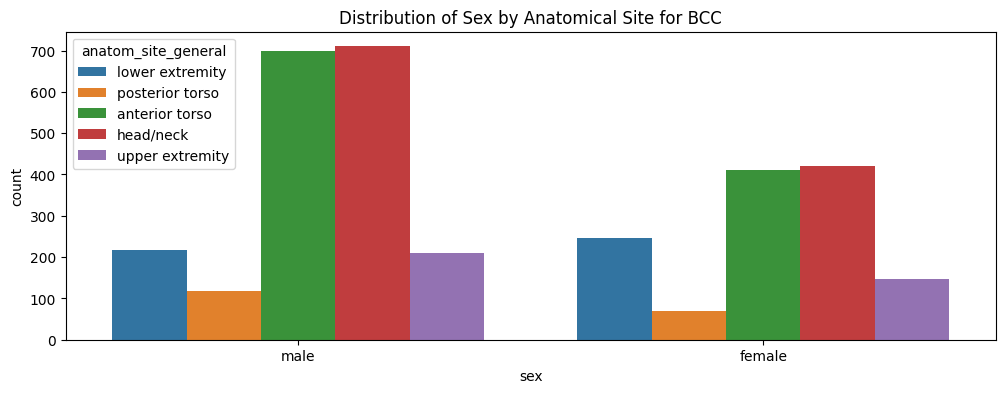

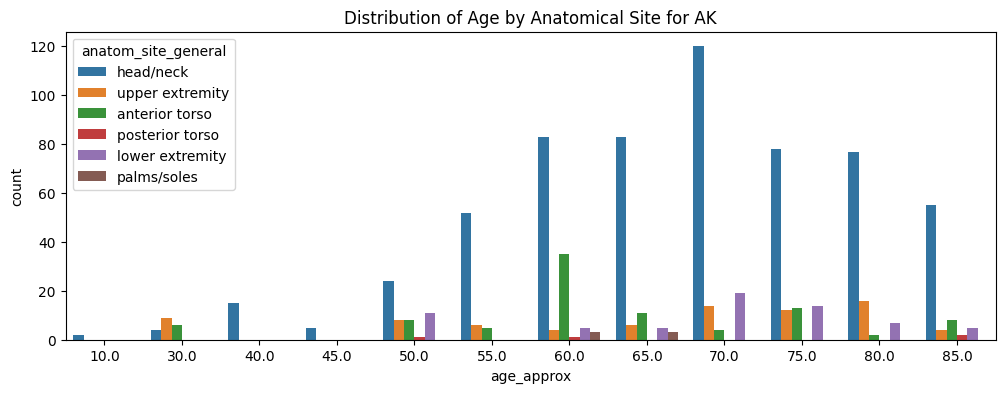

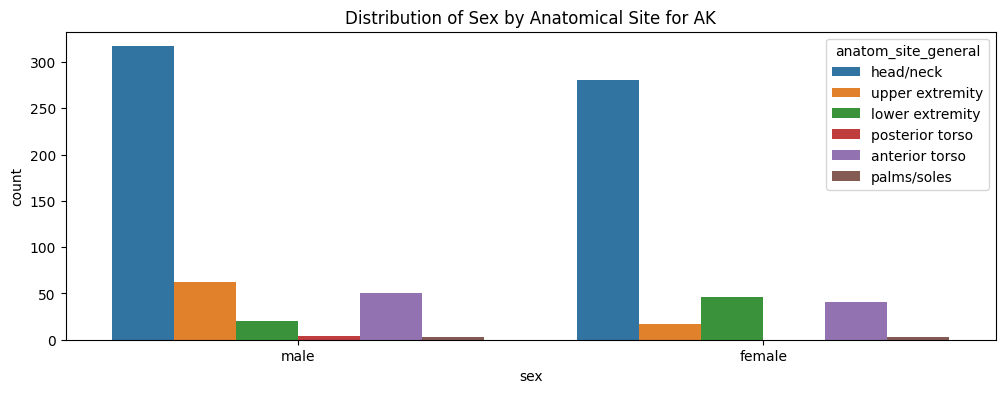

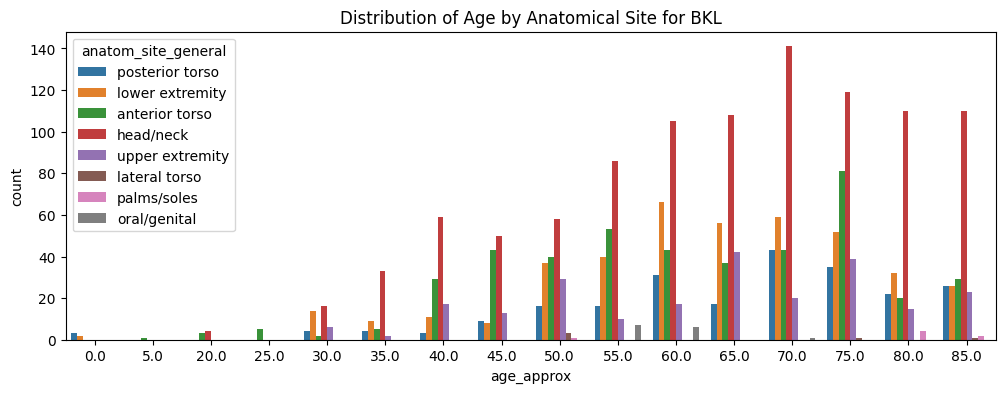

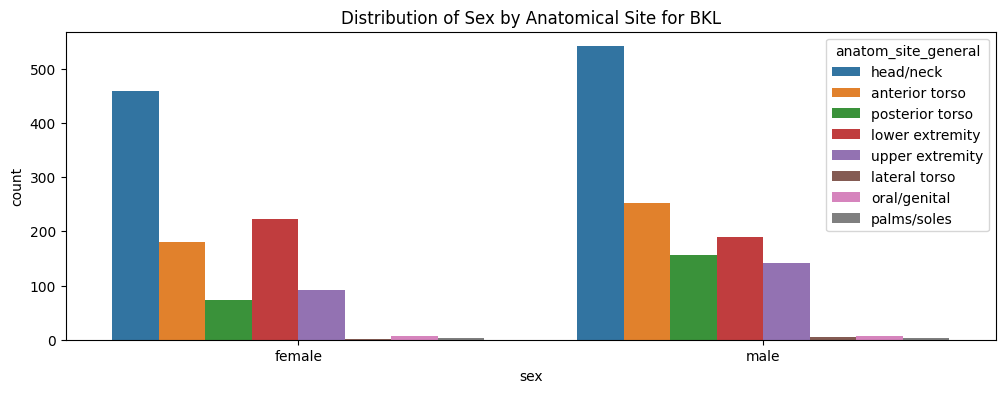

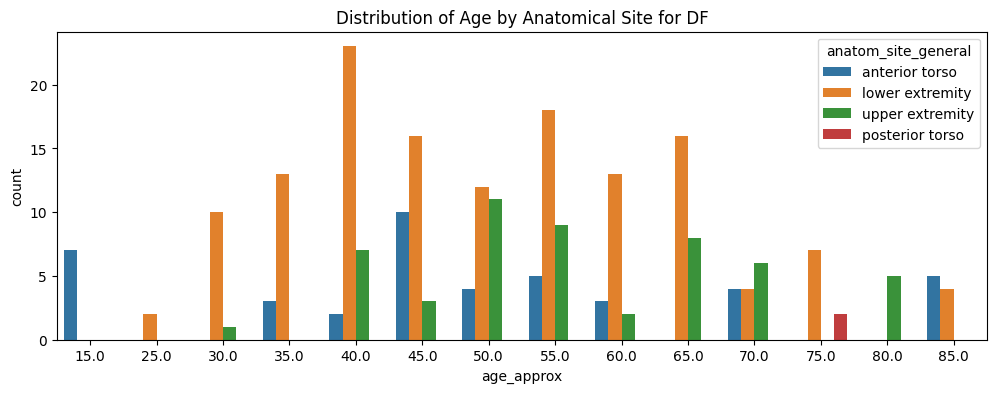

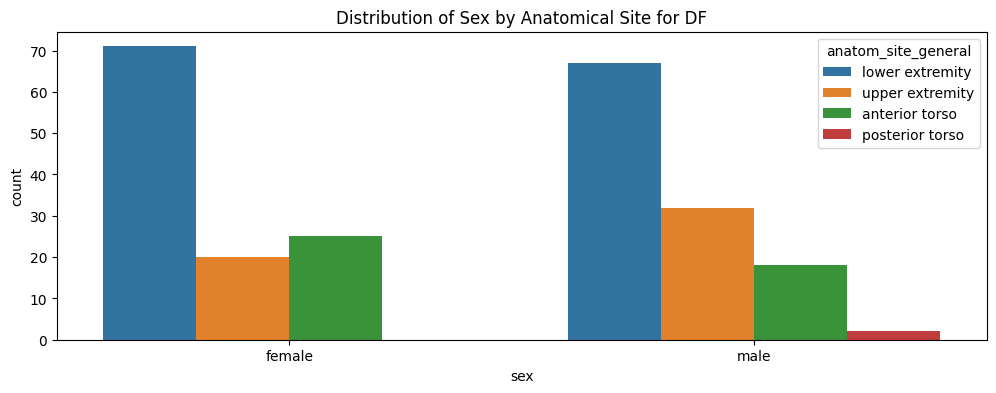

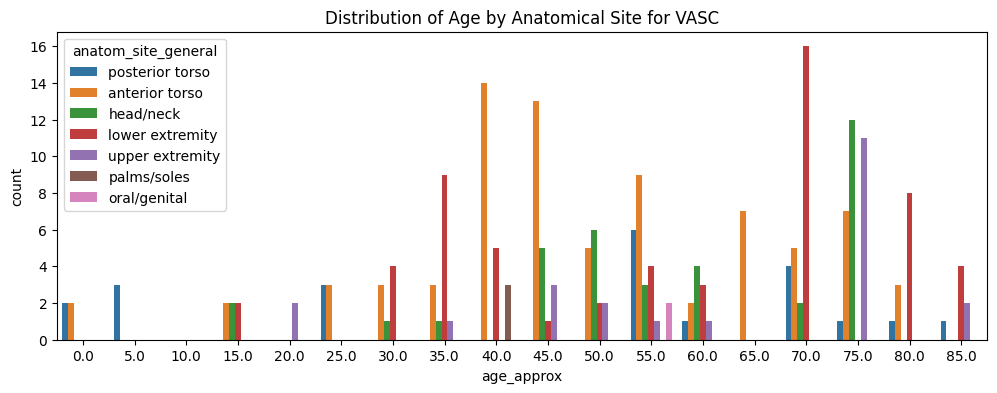

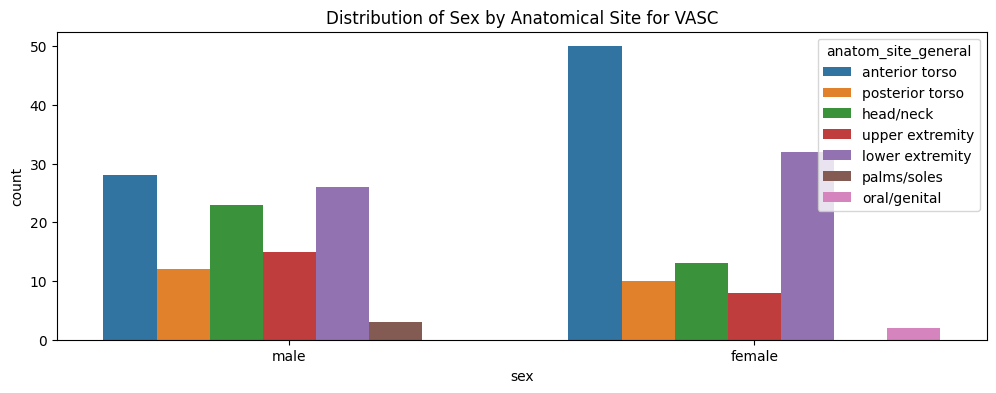

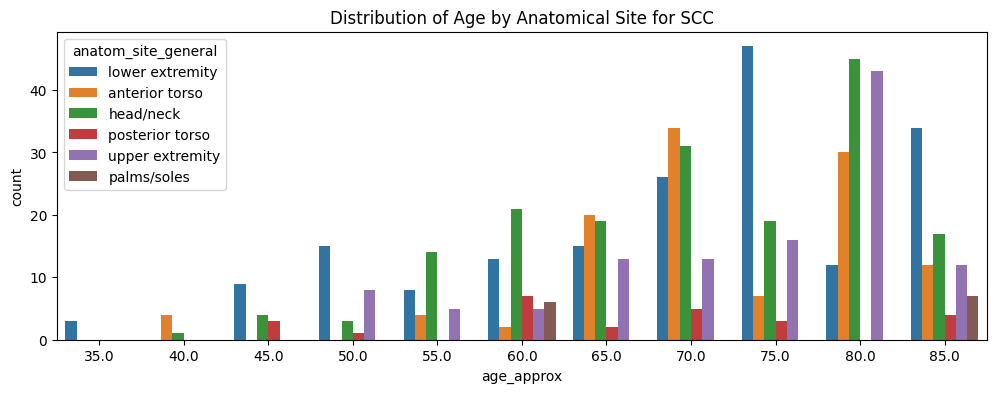

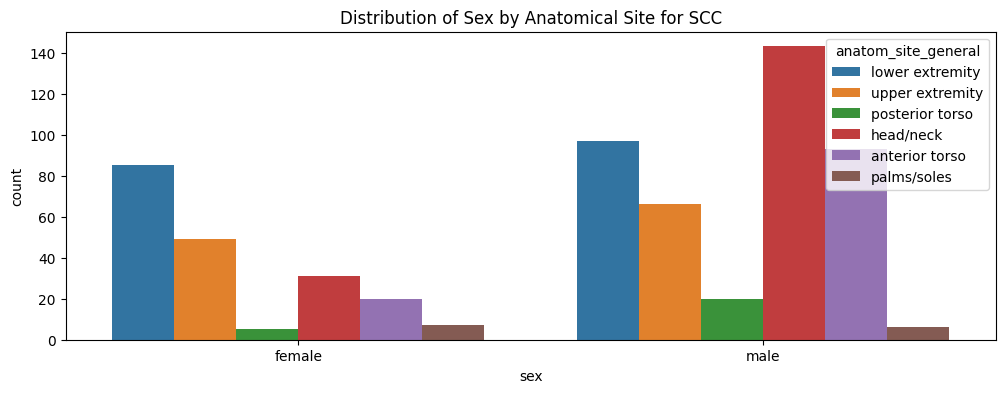

time: 22.5 s (started: 2024-08-03 16:37:19 +00:00)


In [ ]:
# Loop through each disease type
for disease in disease_type:
    # Create a subset of the dataframe for the current disease type
    subset_df = combined_df[combined_df[disease] == 1]

    # Plot the distribution of 'age_approx' by 'anatom_site_general'
    plt.figure(figsize=(12, 4))
    sns.countplot(data=subset_df, x='age_approx', hue='anatom_site_general')
    plt.title(f'Distribution of Age by Anatomical Site for {disease}')
    plt.show()

    # Plot the distribution of 'sex' by 'anatom_site_general'
    plt.figure(figsize=(12, 4))
    sns.countplot(data=subset_df, x='sex', hue='anatom_site_general')
    plt.title(f'Distribution of Sex by Anatomical Site for {disease}')
    plt.show()


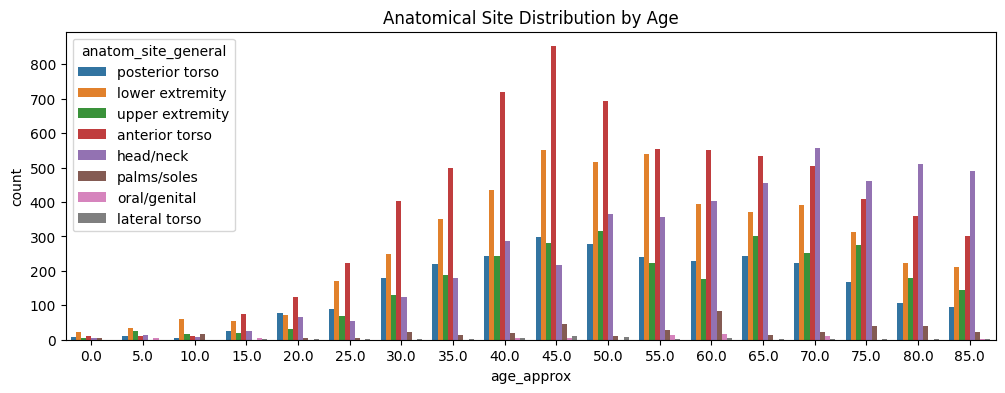

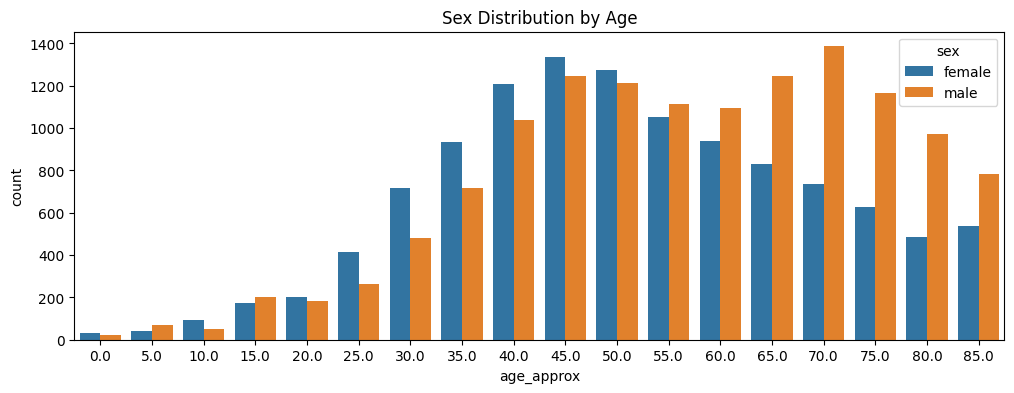

time: 1.47 s (started: 2024-08-03 16:37:41 +00:00)


In [ ]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=train_metadata, x='age_approx', hue='anatom_site_general')
plt.title('Anatomical Site Distribution by Age')
plt.show()

# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=train_metadata, x='age_approx', hue='sex')
plt.title('Sex Distribution by Age')
plt.show()